In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import seaborn as sns
sns.set()
py.init_notebook_mode(connected = True)

In [2]:
df = pd.read_csv('log-CTI-fyp.csv')
df.head()

,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,Payload,SourceIpCountryCode,...,HttpUserAgent,HttpMethod,HttpVersion,HttpHost,Custom Field 1,Custom Field 2,Custom Field 3,Custom Field 4,Custom Field 5,Threat Confidence
0,SinkHoleMessage,1.310000e+17,B106-CB,175.140.89.227,49927,AS4788,204.95.99.31,1921,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,SinkHoleMessage,1.310000e+17,B106-Jenxcus,60.54.85.214,24026,AS4788,204.95.99.86,991,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
2,SinkHoleMessage,1.310000e+17,B106-MULTI,202.162.25.177,58104,AS18206,204.95.99.109,7777,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
3,SinkHoleMessage,1.310000e+17,B106-MULTI,120.141.81.6,53052,AS38322,204.95.99.109,88,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
4,SinkHoleMessage,1.310000e+17,B106-Bladabindi,210.195.121.234,61840,AS4788,204.95.99.26,1333,NaN,MY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


In [3]:
print(df.shape)
missing_values_count = df.isnull().sum()
missing_values_count

(1750, 29)


SourcedFrom               0
FileTimeUtc               0
Botnet                    0
SourceIp                  0
SourcePort                0
SourceIpAsnNr             0
TargetIp                  0
TargetPort                0
Payload                1750
SourceIpCountryCode       0
SourceIpRegion          102
SourceIpCity            102
SourceIpPostalCode     1749
SourceIpLatitude          0
SourceIpLongitude         0
SourceIpMetroCode         0
SourceIpAreaCode          0
HttpRequest              10
HttpReferrer           1739
HttpUserAgent          1748
HttpMethod             1749
HttpVersion            1749
HttpHost               1749
Custom Field 1         1750
Custom Field 2         1750
Custom Field 3         1750
Custom Field 4         1750
Custom Field 5         1750
Threat Confidence         0
dtype: int64

In [4]:
df = df.drop(['Payload','SourceIpPostalCode','HttpReferrer','HttpUserAgent','HttpUserAgent',
        'HttpMethod','HttpVersion','HttpHost','Custom Field 1','Custom Field 2',
        'Custom Field 3','Custom Field 4','Custom Field 5','SourceIpCountryCode'],axis=1)
df.head()

,SourcedFrom,FileTimeUtc,Botnet,SourceIp,SourcePort,SourceIpAsnNr,TargetIp,TargetPort,SourceIpRegion,SourceIpCity,SourceIpLatitude,SourceIpLongitude,SourceIpMetroCode,SourceIpAreaCode,HttpRequest,Threat Confidence
0,SinkHoleMessage,1.310000e+17,B106-CB,175.140.89.227,49927,AS4788,204.95.99.31,1921,14.0,Kuala Lumpur,3.1667,101.7000,0,0,POST /is-ready HTTP/1.1,High
1,SinkHoleMessage,1.310000e+17,B106-Jenxcus,60.54.85.214,24026,AS4788,204.95.99.86,991,NaN,NaN,2.5000,112.5000,0,0,POST /is-ready HTTP/1.1,High
2,SinkHoleMessage,1.310000e+17,B106-MULTI,202.162.25.177,58104,AS18206,204.95.99.109,7777,14.0,Kuala Lumpur,3.1667,101.7000,0,0,POST /ready HTTP/1.1,High
3,SinkHoleMessage,1.310000e+17,B106-MULTI,120.141.81.6,53052,AS38322,204.95.99.109,88,12.0,Batu Caves,3.2333,101.6667,0,0,POST /is-ready HTTP/1.1,High
4,SinkHoleMessage,1.310000e+17,B106-Bladabindi,210.195.121.234,61840,AS4788,204.95.99.26,1333,12.0,Petaling Jaya,3.0833,101.6500,0,0,POST /is-ready HTTP/1.1,High


In [5]:
# legit post request = POST /is-ready HTTP/1.0
# not legit = 33|

requests = []
for i in range(df.shape[0]):
    try:
        if df.HttpRequest.iloc[i].lower().find('post') >= 0:
            requests.append('LEGIT')
        else:
            requests.append('NOT')
    except:
        requests.append('NOT')
        
df['PostLegit'] = requests
df.PostLegit.head()

0    LEGIT
1    LEGIT
2    LEGIT
3    LEGIT
4    LEGIT
Name: PostLegit, dtype: object

In [6]:
legit_unique, legit_count = np.unique(df['PostLegit'], return_counts = True)
data = [go.Bar(
            x=legit_unique,
            y=legit_count,
    text=legit_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 224, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'PostLegit count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [7]:
threat = df['Threat Confidence'].unique().tolist()
data_bar = []
for i in threat:
    legit_unique, legit_count = np.unique(df[df['Threat Confidence']==i]['PostLegit'], return_counts = True)
    data_bar.append(go.Bar(x=legit_unique,y=legit_count,name=i + ' threat'))
layout = go.Layout(
    title = 'threat count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

In [8]:
arrays = []
for i in threat:
    arrays.append(np.unique(df[df['Threat Confidence']==i]['PostLegit'], return_counts = True)[1])
arrays = np.array(arrays)
sum_high = np.sum(arrays[0,:])
sum_low = np.sum(arrays[1,:])

print('ratio high threat for legit:not, %f:%f'%(arrays[0,0]/sum_high,arrays[0,1]/sum_high))
print('ratio low threat for legit:not, %f:%f'%(arrays[1,0]/sum_low,arrays[1,1]/sum_low))

ratio high threat for legit:not, 0.803733:0.196267
ratio low threat for legit:not, 0.292135:0.707865


In [9]:
bot_unique, bot_count = np.unique(df['Botnet'], return_counts = True)
data = [go.Bar(
            x=bot_unique,
            y=bot_count,
    text=bot_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 224, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'bot count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [10]:
threat = df['Threat Confidence'].unique().tolist()
data_bar = []
for i in threat:
    bot_unique, bot_count = np.unique(df[df['Threat Confidence']==i]['Botnet'], return_counts = True)
    data_bar.append(go.Bar(x=bot_unique,y=bot_count,name=i + ' threat'))
layout = go.Layout(
    title = 'bot count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

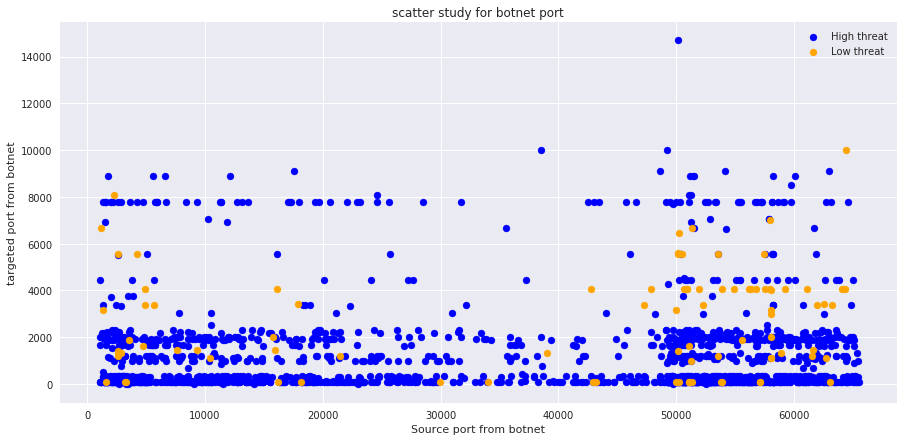

In [15]:
plt.figure(figsize=(15,7))
colors = ['blue','orange']
for no, i in enumerate(threat):
    plt.scatter(df[df['Threat Confidence']==i]['SourcePort'],df[df['Threat Confidence']==i]['TargetPort'],
                label=i+' threat',color=colors[no])
plt.xlabel('Source port from botnet')
plt.ylabel('targeted port from botnet')
plt.title('scatter study for botnet port')
plt.legend()
plt.show()

In [41]:
queries = df[df['Threat Confidence']=='High']['TargetPort'].values
targetport_below_2k = np.where(queries <= 2000)[0]
print('ratio HIGH threat TARGETED port for botnet <= 2k: > 2k, %f:%f'%(targetport_below_2k.shape[0]/queries.shape[0],
                                                (queries.shape[0]-targetport_below_2k.shape[0])/queries.shape[0]))

ratio HIGH threat TARGETED port for botnet <= 2k: > 2k, 0.841060:0.158940


In [40]:
queries = df[df['Threat Confidence']=='Low']['TargetPort'].values
targetport_below_2k = np.where(queries <= 2000)[0]
print('ratio LOW threat TARGETED port for botnet <= 2k: > 2k, %f:%f'%(targetport_below_2k.shape[0]/queries.shape[0],
                                                (queries.shape[0]-targetport_below_2k.shape[0])/queries.shape[0]))

ratio LOW threat TARGETED port for botnet <= 2k: > 2k, 0.494382:0.505618


In [39]:
queries = df[df['Threat Confidence']=='High']['SourcePort'].values
targetport_below_2k = np.where(queries <= df['SourcePort'].max()/2)[0]
print('ratio HIGH threat SOURCE port for botnet <= 2k: > 2k, %f:%f'%(targetport_below_2k.shape[0]/queries.shape[0],
                                                (queries.shape[0]-targetport_below_2k.shape[0])/queries.shape[0]))

ratio HIGH threat SOURCE port for botnet <= 2k: > 2k, 0.443709:0.556291


In [38]:
queries = df[df['Threat Confidence']=='Low']['SourcePort'].values
targetport_below_2k = np.where(queries <= df['SourcePort'].max()/2)[0]
print('ratio LOW threat SOURCE port for botnet <= 2k: > 2k, %f:%f'%(targetport_below_2k.shape[0]/queries.shape[0],
                                                (queries.shape[0]-targetport_below_2k.shape[0])/queries.shape[0]))

ratio LOW threat SOURCE port for botnet <= 2k: > 2k, 0.314607:0.685393


In [42]:
source_unique, source_count = np.unique(df['SourceIpAsnNr'], return_counts = True)
data = [go.Bar(
            x=source_unique,
            y=source_count,
    text=source_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 224, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'source IP count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

AS4788 is TM.NET

AS9534 is Binariang Berhad

AS10030 is Celcom internet Provider

AS38322 is WEBE

AS45960 is YTL Communication

In [46]:
threat = df['Threat Confidence'].unique().tolist()
data_bar = []
for i in threat:
    isp_unique, isp_count = np.unique(df[df['Threat Confidence']==i]['SourceIpAsnNr'], return_counts = True)
    data_bar.append(go.Bar(x=isp_unique,y=isp_count,name=i + ' threat'))
layout = go.Layout(
    title = 'isp count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

In [44]:
df['SourceIpCity']=df['SourceIpCity'].fillna('Balingian')

In [45]:
city_unique, city_count = np.unique(df['SourceIpCity'], return_counts = True)
data = [go.Bar(
            x=city_unique,
            y=city_count,
    text=city_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 224, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'City count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [47]:
threat = df['Threat Confidence'].unique().tolist()
data_bar = []
for i in threat:
    city_unique, city_count = np.unique(df[df['Threat Confidence']==i]['SourceIpCity'], return_counts = True)
    data_bar.append(go.Bar(x=city_unique,y=city_count,name=i + ' threat'))
layout = go.Layout(
    title = 'city count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

In [90]:
data = [ dict(
        type = 'scattergeo',
        lon = df['SourceIpLongitude'],
        lat = df['SourceIpLatitude'],
        text = df['SourceIpCity']+ ': ' + df['Threat Confidence'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            )
        ))]

layout = dict(
        title = 'Source city counts',
        geo = dict(
            scope = 'malaysia',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
            lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ df['SourceIpLongitude'].min()-5, df['SourceIpLongitude'].max()+5],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [df['SourceIpLatitude'].min()-5, df['SourceIpLatitude'].max()+5],
            dtick = 5
        )
        ),
    )

fig = dict( data=data, layout=layout)
py.iplot(fig)

In [67]:
first_source, first_num = [], []
for i in range(df.shape[0]):
    first_source.append(df['SourceIp'].iloc[i].split('.')[0]+'.X.X.X')
    first_num.append(int(df['SourceIp'].iloc[i].split('.')[0]))
df['FirstSource'] = first_source
df['FirstNum'] = first_num
df['FirstSource'].head()

0    175.X.X.X
1     60.X.X.X
2    202.X.X.X
3    120.X.X.X
4    210.X.X.X
Name: FirstSource, dtype: object

In [53]:
firstsource_unique, firstsource_count = np.unique(df['FirstSource'], return_counts = True)
data = [go.Bar(
            x=firstsource_unique,
            y=firstsource_count,
    text=firstsource_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 224, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'firstsource count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [58]:
threat = df['Threat Confidence'].unique().tolist()
data_bar = []
for i in threat:
    FirstSource_unique, FirstSource_count = np.unique(df[df['Threat Confidence']==i]['FirstSource'], return_counts = True)
    data_bar.append(go.Bar(x=FirstSource_unique,y=FirstSource_count,name=i + ' threat'))
layout = go.Layout(
    title = 'FirstSource count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

In [56]:
targetip_unique, targetip_count = np.unique(df['TargetIp'], return_counts = True)
data = [go.Bar(
            x=targetip_unique,
            y=targetip_count,
    text=targetip_count,
    textposition = 'auto',
            marker=dict(
                color='rgb(179, 224, 255)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=0.5),
            ),
            opacity=0.9
)]
layout = go.Layout(
    title = 'targetip count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [57]:
threat = df['Threat Confidence'].unique().tolist()
data_bar = []
for i in threat:
    TargetIp_unique, TargetIp_count = np.unique(df[df['Threat Confidence']==i]['TargetIp'], return_counts = True)
    data_bar.append(go.Bar(x=TargetIp_unique,y=TargetIp_count,name=i + ' threat'))
layout = go.Layout(
    title = 'TargetIp count',
     margin = dict(
        t = 50
    )
)
fig = go.Figure(data = data_bar, layout = layout)
py.iplot(fig)

In [60]:
from sklearn.preprocessing import LabelEncoder

df['threat_int']=LabelEncoder().fit_transform(df['Threat Confidence'])

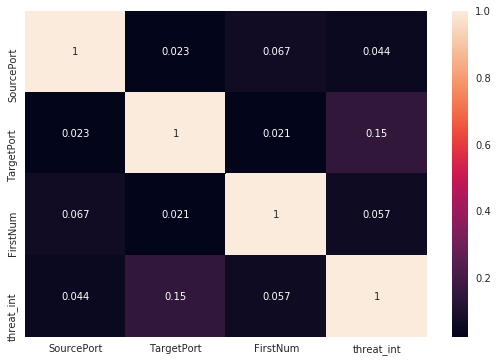

In [69]:
plt.figure(figsize=(9,6))
sns.heatmap(df[['SourcePort','TargetPort','FirstNum','threat_int']].corr(), annot=True)
plt.show()

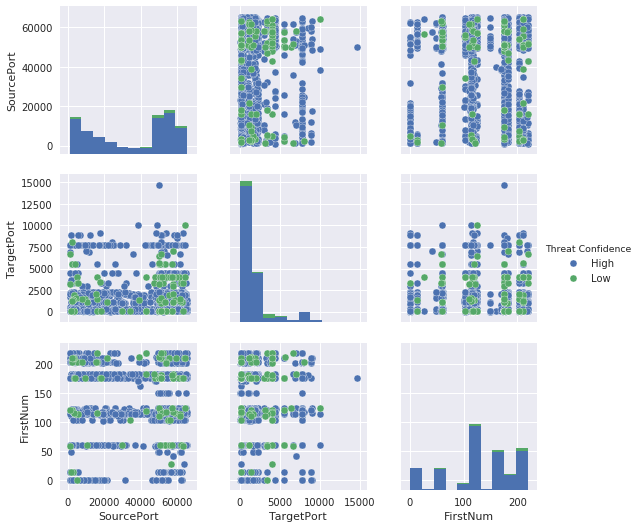

In [76]:
plt.figure(figsize=(20, 15))
sns.pairplot(df[['SourcePort','TargetPort','FirstNum','Threat Confidence']], hue="Threat Confidence")
plt.show()

In [93]:
X = df[['Botnet','FirstSource','PostLegit','SourceIpCity','TargetPort','TargetIp','SourceIpAsnNr','SourcePort']]
X.head()

,Botnet,FirstSource,PostLegit,SourceIpCity,TargetPort,TargetIp,SourceIpAsnNr,SourcePort
0,B106-CB,175.X.X.X,LEGIT,Kuala Lumpur,1921,204.95.99.31,AS4788,49927
1,B106-Jenxcus,60.X.X.X,LEGIT,Balingian,991,204.95.99.86,AS4788,24026
2,B106-MULTI,202.X.X.X,LEGIT,Kuala Lumpur,7777,204.95.99.109,AS18206,58104
3,B106-MULTI,120.X.X.X,LEGIT,Batu Caves,88,204.95.99.109,AS38322,53052
4,B106-Bladabindi,210.X.X.X,LEGIT,Petaling Jaya,1333,204.95.99.26,AS4788,61840


In [100]:
X[['Botnet','FirstSource','PostLegit','SourceIpCity','TargetIp','SourceIpAsnNr']]=X[['Botnet','FirstSource','PostLegit','SourceIpCity','TargetIp','SourceIpAsnNr']].apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:2352: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [101]:
X.head()

,Botnet,FirstSource,PostLegit,SourceIpCity,TargetPort,TargetIp,SourceIpAsnNr,SourcePort
0,2,19,0,52,1921,13,29,49927
1,10,33,0,9,991,22,29,24026
2,11,23,0,52,7777,1,8,58104
3,11,10,0,13,88,1,22,53052
4,1,25,0,75,1333,12,29,61840


In [94]:
Y = df['threat_int']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: threat_int, dtype: int64

In [102]:
from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [104]:
from sklearn.ensemble import *
from sklearn import metrics

gb = GradientBoostingClassifier().fit(X_train, Y_train)
ada = AdaBoostClassifier().fit(X_train, Y_train)
bagging = BaggingClassifier().fit(X_train, Y_train)
rf = RandomForestClassifier().fit(X_train, Y_train)

# Gradient boosting validation

In [106]:
print(metrics.classification_report(Y_test, gb.predict(X_test), target_names = df['Threat Confidence'].unique()))

             precision    recall  f1-score   support

       High       1.00      1.00      1.00       334
        Low       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00       350



# Adaboost validation

In [107]:
print(metrics.classification_report(Y_test, ada.predict(X_test), target_names = df['Threat Confidence'].unique()))

             precision    recall  f1-score   support

       High       1.00      1.00      1.00       334
        Low       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00       350



# Bagging validation

In [108]:
print(metrics.classification_report(Y_test, bagging.predict(X_test), target_names = df['Threat Confidence'].unique()))

             precision    recall  f1-score   support

       High       1.00      1.00      1.00       334
        Low       1.00      1.00      1.00        16

avg / total       1.00      1.00      1.00       350



# random forest validation

In [109]:
print(metrics.classification_report(Y_test, rf.predict(X_test), target_names = df['Threat Confidence'].unique()))

             precision    recall  f1-score   support

       High       1.00      1.00      1.00       334
        Low       1.00      0.94      0.97        16

avg / total       1.00      1.00      1.00       350



## These 4 classifiers able to achieve perfect score for our validation dataset. so no need to do further stacking.

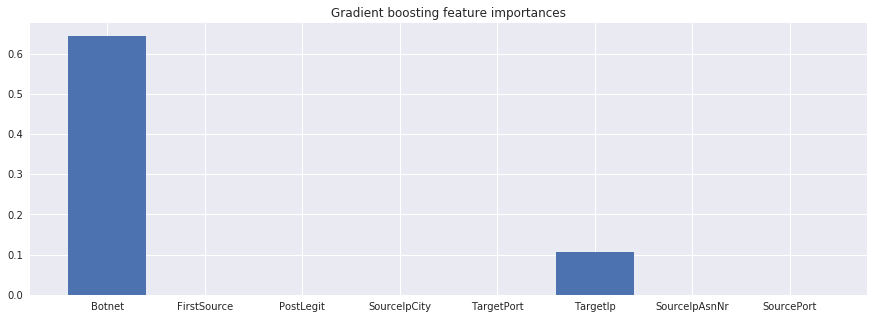

In [117]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(X.shape[1]),gb.feature_importances_)
plt.xticks(np.arange(X.shape[1]), list(X))
plt.title('Gradient boosting feature importances')
plt.show()

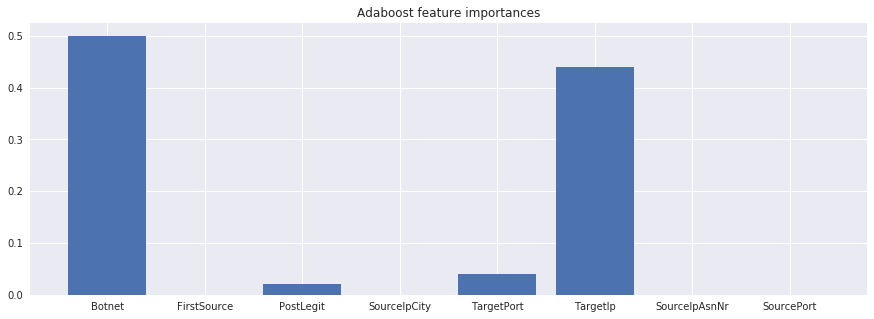

In [118]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(X.shape[1]),ada.feature_importances_)
plt.xticks(np.arange(X.shape[1]), list(X))
plt.title('Adaboost feature importances')
plt.show()

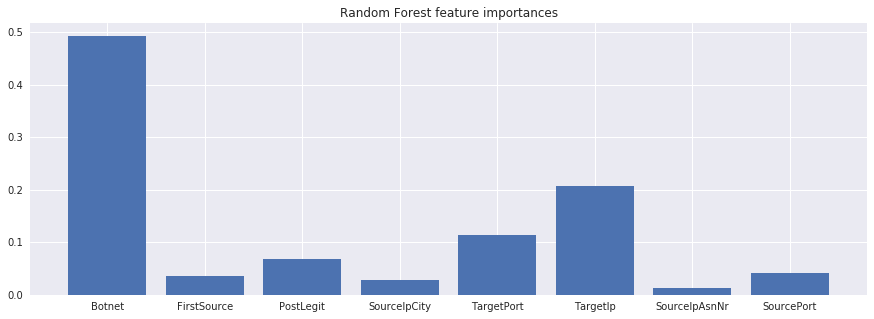

In [120]:
plt.figure(figsize=(15, 5))
plt.bar(np.arange(X.shape[1]),rf.feature_importances_)
plt.xticks(np.arange(X.shape[1]), list(X))
plt.title('Random Forest feature importances')
plt.show()

## Different classifier different features selection. But all saying botnet is the most important feature that brings the most impact to the results.